# Deep Learning HW3

# Libraries

In [17]:
import os
from keras.preprocessing.image import load_img
import matplotlib.pyplot as plt
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Dataset

In [12]:
# Directories for training and test data
train_dir = 'C:/Users/snvn7/Desktop/Deep Learning HW/Dataset/train'
test_dir = 'C:/Users/snvn7/Desktop/Deep Learning HW/Dataset/test'

def get_class_counts_and_image_shape(data_dir):
    # List of class names based on directory names
    classes = os.listdir(data_dir)

    # Initialize an empty dictionary to store counts
    class_counts = {}

    # Initialize shape variable
    img_shape = ()

    # Loop through each class directory to count the number of files (images)
    for cls in classes:
        class_dir = os.path.join(data_dir, cls)
        images = os.listdir(class_dir)
        count = len(images)
        class_counts[cls] = count

        # Optionally get the shape of the first image of the first class
        if not img_shape:  # Do this once
            img_path = os.path.join(class_dir, images[0])
            img = load_img(img_path)
            img_shape = img.size  # Note: This gives width, height

    return class_counts, img_shape

# Get train and test class counts and image shapes
train_class_counts, train_img_shape = get_class_counts_and_image_shape(train_dir)
test_class_counts, test_img_shape = get_class_counts_and_image_shape(test_dir)

print("Train class counts:", train_class_counts)
print("Train image shape:", train_img_shape)
print("Test class counts:", test_class_counts)
print("Test image shape:", test_img_shape)



Train class counts: {'airplanes': 1000, 'cars': 1000, 'ship': 1000}
Train image shape: (1200, 1200)
Test class counts: {'airplanes': 189, 'cars': 193, 'ships': 200}
Test image shape: (1200, 1200)


# Displaying sample images in each class

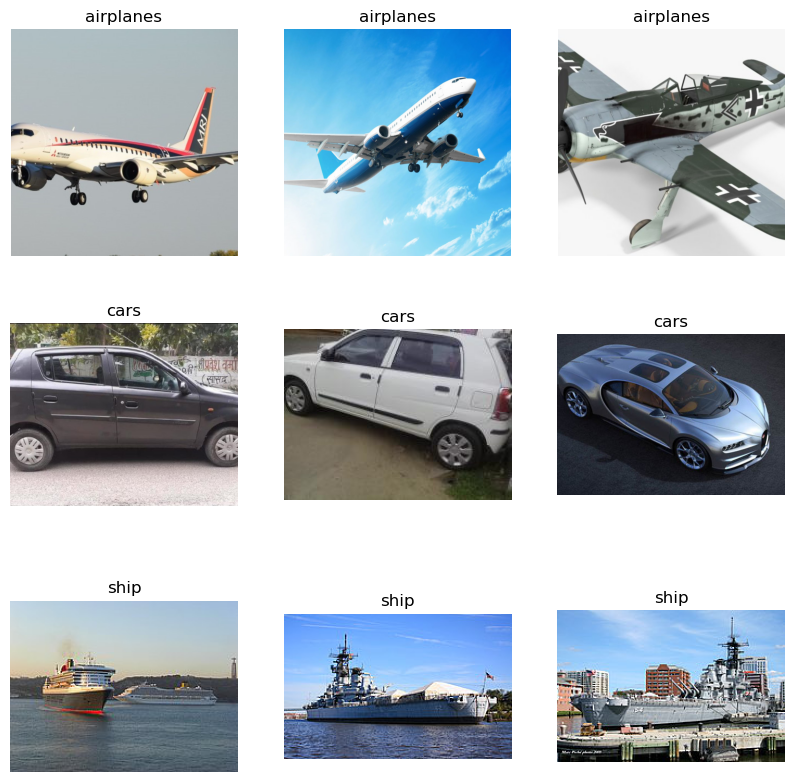

In [18]:
base_dir = 'C:/Users/snvn7/Desktop/Deep Learning HW/Dataset/train'
classes = ['airplanes', 'cars', 'ship']

plt.figure(figsize=(10, 10))
for idx, cls in enumerate(classes):
    path = os.path.join(base_dir, cls)
    files = os.listdir(path)[:3]  # Get the first 3 images of each class
    for i, file in enumerate(files):
        img = load_img(os.path.join(path, file))
        plt.subplot(3, 3, idx * 3 + i + 1)
        plt.imshow(img)
        plt.title(cls)
        plt.axis('off')
plt.savefig('C:/Users/snvn7/Desktop/Deep Learning HW/Image1.png')
plt.show()


# Checking for corrupt images

In [13]:
def check_images(directory):
    corrupted = []
    for subdir, dirs, files in os.walk(directory):
        for file in files:
            if not file.endswith(('jpg')):
                continue
            filepath = os.path.join(subdir, file)
            try:
                img = Image.open(filepath)  # Open the image file.
                img.verify()  # Verify that it is, in fact, an image.
            except (IOError, SyntaxError) as e:
                print('Bad file:', filepath)  # Print out the names of corrupted files.
                corrupted.append(filepath)
    return corrupted

directory = 'C:/Users/snvn7/Desktop/Deep Learning HW/Dataset'

corrupted_images = check_images(directory)
print(f"Found {len(corrupted_images)} corrupted images.")

Found 0 corrupted images.


# Fitting the model

In [14]:
width, height = 224, 224

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,  # Rotates the images by up to 40 degrees
    width_shift_range=0.2,  # Translates the images horizontally by up to 20% of the width
    height_shift_range=0.2,  # Translates the images vertically by up to 20% of the height
    shear_range=0.2,  # Shears the images by up to 20%
    zoom_range=0.2,  # Zooms inside the images by up to 20%
    horizontal_flip=True,  # Enables horizontal flipping of images
    fill_mode='nearest',  # Fills in new pixels with the nearest filled value
    validation_split=0.2  # Still reserving 20% of the data for validation
)

data_dir = 'C:/Users/snvn7/Desktop/Deep Learning HW/Dataset/train'

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(width, height),
    batch_size=20,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(width, height),
    batch_size=20,
    class_mode='categorical',
    subset='validation'
)

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(width, height, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # 3 classes
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=[early_stopping]
)


Found 2400 images belonging to 3 classes.
Found 600 images belonging to 3 classes.
Epoch 1/30
120/120 [==============================] - 155s 1s/step - loss: 1.0783 - accuracy: 0.5763 - val_loss: 0.7792 - val_accuracy: 0.6600
Epoch 2/30
120/120 [==============================] - 161s 1s/step - loss: 0.6571 - accuracy: 0.7308 - val_loss: 0.6720 - val_accuracy: 0.7150
Epoch 3/30
120/120 [==============================] - 149s 1s/step - loss: 0.4986 - accuracy: 0.8183 - val_loss: 0.5086 - val_accuracy: 0.7917
Epoch 4/30
120/120 [==============================] - 140s 1s/step - loss: 0.4458 - accuracy: 0.8342 - val_loss: 0.4887 - val_accuracy: 0.8067
Epoch 5/30
120/120 [==============================] - 154s 1s/step - loss: 0.4025 - accuracy: 0.8475 - val_loss: 0.3428 - val_accuracy: 0.8583
Epoch 6/30
120/120 [==============================] - 140s 1s/step - loss: 0.3571 - accuracy: 0.8621 - val_loss: 0.3132 - val_accuracy: 0.8850
Epoch 7/30
120/120 [==============================] - 151s 

# Ploting the training and validation - accuracy and loss

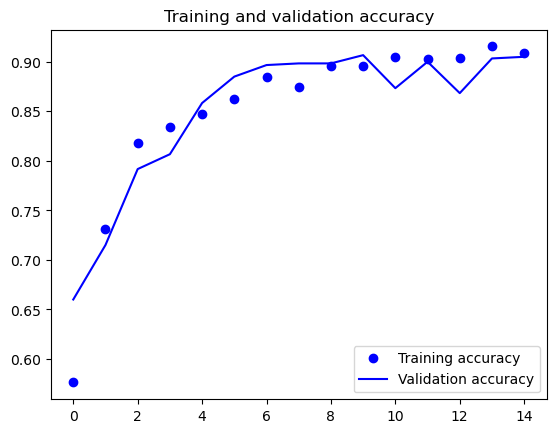

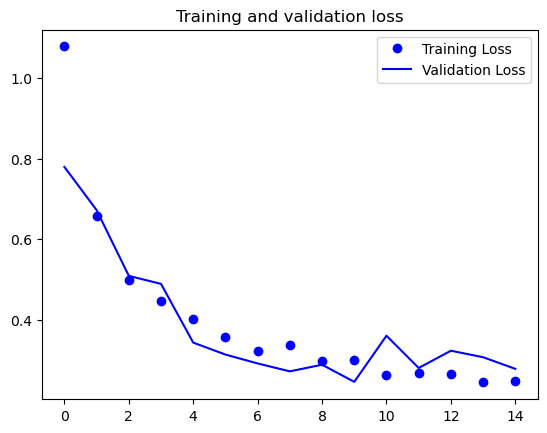

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig('C:/Users/snvn7/Desktop/Deep Learning HW/Image2.png')
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig('C:/Users/snvn7/Desktop/Deep Learning HW/Image3.png')
plt.show()


# Performance Evaluation on Test Set

In [16]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_dir = 'C:/Users/snvn7/Desktop/Deep Learning HW/Dataset/test'

# Load the test data
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='categorical',
    shuffle=False)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


Found 582 images belonging to 3 classes.
29/29 [==============================] - 14s 453ms/step - loss: 0.2932 - accuracy: 0.9017
Test Loss: 0.29320842027664185
Test Accuracy: 0.9017241597175598
